<a href="https://colab.research.google.com/github/EthicalFlipper/MachineLearning/blob/main/MyNeuralNetwork_(Densely_Connected_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
(10000, 28, 28)


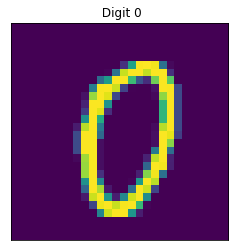

0 255


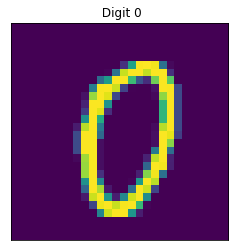

0.0 1.0


In [ ]:
# Keras to create the neural network
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import backend as K
import numpy as np
# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt
%matplotlib inline

img_rows, img_cols = 28, 28 #Variables to help keep track of image size
num_classes = 10 #Output classes
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #This line will load data to train the model, and data to test it, as well as the labels to test the data against.
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data() #Backup data just in case something happens, and its an extra copy of untouched data
print(train_images.shape)
print(test_images.shape)

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1) #Keep track of what shape the data is

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show() #Show the image

plot_image(train_images, 1000, train_labels) #Call plot_image function and pass it train_images, 100, test_images
show_min_max(train_images, 1000) #Same thing as plot_image function

train_images[3000:]= 255 - train_images[3000:] #Invert half of the training images

train_images = train_images.astype('float32') #Convert data into float32
test_images = test_images.astype('float32') #Convert data into float32

train_images /= 255 #Divide by 255 so each pixel is stored by value 0-1
test_images /= 255 #Divide by 255 so each pixel is stored by value 0-1

plot_image(train_images, 1000, train_labels) #Call plot_image function and pass it train_images, 100, test_images
show_min_max(train_images, 1000) #Same thing as plot_image function

train_labels = keras.utils.to_categorical(train_labels, num_classes) #Employ one-hot encoding on your data. One-hot encoding makes the network view each number independently
test_labels = keras.utils.to_categorical(test_labels, num_classes) #Employ one-hot encoding on your data.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

epochs = 15 #Make a variable that keeps track of epochs
model = Sequential() #Model object
#Flatten layer - will take your prepared image data and flatten it into a long series of numbers representing pixels
model.add(Flatten(input_shape = input_shape)) #Add first layer (the flatten layer)
#Calculation layers - to perform predictions on the data 
model.add(Dense(16, activation = 'relu')) #Add a calculation layer (with 16 neurons), activation function is 'relu' in this case
model.add(Dense(10, activation = 'relu')) #Challenge: Add another calculation layer (middle layer)
#Output layers - shrink the previous layer down to just the number of possible classes
model.add(Dense(10, activation = 'softmax'))
#Summary
model.summary()
#Compile
#model.compile(loss = 'categorical_crossentropy') #Add loss function to compile function
#model.compile(loss = 'categorical_crossentropy',  optimizer = 'adam') #Use the optimizer parameter to set the optimization algorithm
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #accuracy measures what percentage of the input images the model correctly predicted (similar to loss)
#Training
model.fit(train_images, train_labels, epochs = epochs, shuffle = True) #Add fit function with arguments train_images, train_labels, epochs = epochs and shuffle (shuffle so the network doesn't rely on the order to learn) 
#Analyzing Output - how well it does on data it hasn't seen before and doesn't know the labels for
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2) #Calculate accuracy and loss of model
print('\nTest accuracy:', test_acc) #Print accuracy 
#model.save('my_model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 12,840
Trainable params: 12,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3823 - accuracy: 0.5292
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.83

Enter the number that will be used for the picture3


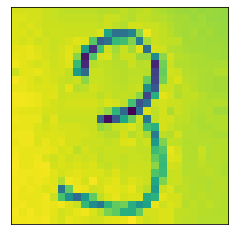

Predicted Label:  3


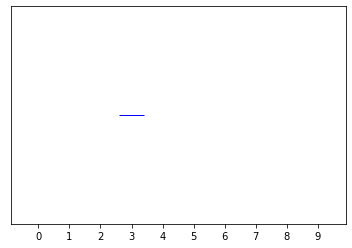

In [ ]:
import keras
from google.colab import files
from keras.preprocessing import image
from PIL import Image, ImageChops 

number_in_picture = int(input("Enter the number that will be used for the picture"))
#predict_image function will take a 28x28 pixel image, convert it to the right data for your network, and then use the model to predict what the label for it should be.  Then it will plot the image,\ print the predicted label, and return the predictions array
def predict_image(x):
  x = x.astype('float32')
  x = x / 255.0

  x = np.expand_dims(x, axis=0)

  image_predict = model.predict(x, verbose = 0)

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()
  print("Predicted Label: ", np.argmax(image_predict))
  return image_predict

#plot_value_array function will plot the network's output layer on a graph. It will color the bar for the correct label blue, and if the model predicts the wrong label, it will color it red
def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([-100, 100])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()

#Load picture into notebook
path = '/content/' + "test3w.jpg" 
img = tf.keras.utils.load_img(path, target_size=(28,28), color_mode = "grayscale")
#Convert image to an array
img_arr = tf.keras.utils.img_to_array(img)
#Call predict_image function on array image
arr = predict_image(img_arr)
#Call plot_value_array
plot_value_array(arr, number_in_picture)